# Assignment Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variable are significant in predicting the demand for shared bikes

 - How well those variables describe the bike demands

# Business Goal

Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Data Understanding 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("day.csv")

In [3]:
#Checking for column data types and if null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#confirming that there are no null entries
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Checking for number of columns and rows
df.shape

(730, 16)

In [6]:
# Looking at the entries
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Looking the statistical distribution of column
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Cleaning

In [8]:
# Looking at the column names
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# Looking at the entries
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Dropping "instant" because it is basically the index column
df.drop("instant", axis=1, inplace=True)

In [11]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Dropping "casual" and "registered" as our analysis is based on the total demand and not demand category
df.drop(["casual", "registered"], axis=1, inplace=True)

In [13]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Temp and Atemp seem to be similar. Let's investigate

df.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [15]:
df.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

### Observation
atemp seems to far more spread than temp with greater range (max - min) and greater standard deviation

In [16]:
# Let's find their correlation to confirm they are related

In [17]:
corr, _ = pearsonr(df.temp, df.atemp)

In [18]:
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.992


### Observation
- atemp and temp are highly correlated with 0.99 correlation. Therefore, we can drop one. 
- Since Feels like temperature is what an individual experiences, we will keep atemp and drop temp. 

In [19]:
# Dropping temp
df.drop("temp", axis=1, inplace=True)

In [20]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [21]:
# Columns "dteday", "yr", "mnth", "weekday" are all related to the date of renting the cycle. 
# Let's us check for the consistency of these columns

In [22]:
# Converting dteday to datetime object
df.dteday = df.dteday.apply(lambda x: dt.strptime(x, "%d-%m-%Y"))

In [23]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [24]:
df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [25]:
# It seems that 0 corresponds to 2018 and 1 corresponds to 2019 in yr
df.yr = df.yr.apply(lambda x: 2018 if x==0 else 2019)

In [26]:
df['yr_name'] = df.dteday.apply(lambda x: x.year)

In [27]:
df['month_name'] = df.dteday.apply(lambda x: x.month)

In [28]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,yr_name,month_name
0,2018-01-01,1,2018,1,0,6,0,2,18.18125,80.5833,10.749882,985,2018,1
1,2018-01-02,1,2018,1,0,0,0,2,17.68695,69.6087,16.652113,801,2018,1
2,2018-01-03,1,2018,1,0,1,1,1,9.47025,43.7273,16.636703,1349,2018,1
3,2018-01-04,1,2018,1,0,2,1,1,10.60610,59.0435,10.739832,1562,2018,1
4,2018-01-05,1,2018,1,0,3,1,1,11.46350,43.6957,12.522300,1600,2018,1


In [29]:
# creating a function to check for the consistency of calendar columns (month, year)
def check_consistency(df):
    for i in range(0, len(df)):
        record = df.iloc[i]
        if record.month_name != record.mnth:
            print("Mismatch present at location: ",i)
            break
        elif  int(record.yr) != int(record.yr_name):
            print("Mismatch present with year at location: ", i)
            break
    print("No mismatch")

In [30]:
check_consistency(df)

No mismatch


### Observation

- no inconsistency found with year and month 
- Hence, we can delete these columns as they are redundant

In [31]:
df.drop(['yr_name', 'month_name'], axis=1, inplace=True)

In [32]:
# Let's Change months and yr to categorical variable and change month their names to Jan, Feb etc

df.yr = df.yr.astype("category")

In [33]:
month_map = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
             7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

In [34]:
df['mnth'] = df['mnth'].map(month_map)

In [35]:
df.mnth = df.mnth.astype("category")

In [36]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,2018-01-01,1,2018,Jan,0,6,0,2,18.18125,80.5833,10.749882,985
1,2018-01-02,1,2018,Jan,0,0,0,2,17.68695,69.6087,16.652113,801
2,2018-01-03,1,2018,Jan,0,1,1,1,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,2018,Jan,0,2,1,1,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,2018,Jan,0,3,1,1,11.46350,43.6957,12.522300,1600


In [37]:
# Let's see "weekday" and check its consistency with dteday

In [38]:
df['week_name'] =  df.dteday.apply(lambda x: x.strftime("%a"))

In [39]:
df[['week_name', 'weekday']]

,week_name,weekday
0,Mon,6
1,Tue,0
2,Wed,1
3,Thu,2
4,Fri,3
...,...,...
725,Fri,4
726,Sat,5
727,Sun,6
728,Mon,0


### Observation

- There is discrepencies in the data. 
- **Monday** maps to 6 (index 0) as well as 0 (index 728)
- **Friday** maps to 3 (index 4) as well as 4 (index 725)
- This is most likely due to mistake of not accounting for two different years
- Since the derived attribute week_name accounts for it, it is correct (verfied with calendar) 
- Therefore, we will drop weekday and keep week_name

In [40]:
df.drop("weekday", axis=1, inplace=True)
df.rename(columns={"week_name":"weekday"}, inplace=True)

In [41]:
df['weekday'] = df.weekday.astype("category")
df.head()

,dteday,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,weekday
0,2018-01-01,1,2018,Jan,0,0,2,18.18125,80.5833,10.749882,985,Mon
1,2018-01-02,1,2018,Jan,0,0,2,17.68695,69.6087,16.652113,801,Tue
2,2018-01-03,1,2018,Jan,0,1,1,9.47025,43.7273,16.636703,1349,Wed
3,2018-01-04,1,2018,Jan,0,1,1,10.60610,59.0435,10.739832,1562,Thu
4,2018-01-05,1,2018,Jan,0,1,1,11.46350,43.6957,12.522300,1600,Fri


In [42]:
# since we have extrated all the important data from "dteday" we can now drop it
df.drop("dteday", axis=1, inplace=True)

In [43]:
# It seems that Monday and Tuesday are labelled as Non-Working Days. Let's check for consistency

df.loc[(df.weekday == "Tue") & (df.workingday == 1)].head(3)

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,weekday
428,1,2019,Mar,0,1,1,12.05855,50.6250,15.333486,3333,Tue
435,1,2019,Mar,0,1,1,22.97960,48.9167,13.916771,5298,Tue
442,1,2019,Mar,0,1,1,26.64105,72.8750,10.875239,6153,Tue


In [44]:
df.loc[(df.weekday == "Tue") & (df.workingday == 0)].head(3)

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,weekday
1,1,2018,Jan,0,0,2,17.68695,69.6087,16.652113,801,Tue
8,1,2018,Jan,0,0,1,5.80875,43.4167,24.250650,822,Tue
15,1,2018,Jan,0,0,1,11.71085,48.3750,12.625011,1204,Tue


In [45]:
# Working day column has inconsistency. Tuesday is marked as working day for 2019 but non-working day for 2018
# Deleting workingday column

df.drop("workingday", axis=1,inplace=True)

### Mapping with Data Dictionary
 - Mapping categorical columns with numeric values with their right labels

In [46]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [47]:
# Data Dictionary ---> (1:spring, 2:summer, 3:fall, 4:winter)
df.season = df.season.map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

In [48]:
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

### weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



In [49]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### Observation
- No heavy rain present in actual dataset

In [50]:
df.weathersit = df.weathersit.map({1: "Clear", 2: "Mist", 3: "Snow/Rain"})

df.weathersit.value_counts()

Clear        463
Mist         246
Snow/Rain     21
Name: weathersit, dtype: int64

In [51]:
df.head()

,season,yr,mnth,holiday,weathersit,atemp,hum,windspeed,cnt,weekday
0,Spring,2018,Jan,0,Mist,18.18125,80.5833,10.749882,985,Mon
1,Spring,2018,Jan,0,Mist,17.68695,69.6087,16.652113,801,Tue
2,Spring,2018,Jan,0,Clear,9.47025,43.7273,16.636703,1349,Wed
3,Spring,2018,Jan,0,Clear,10.60610,59.0435,10.739832,1562,Thu
4,Spring,2018,Jan,0,Clear,11.46350,43.6957,12.522300,1600,Fri


# Outlier Handling

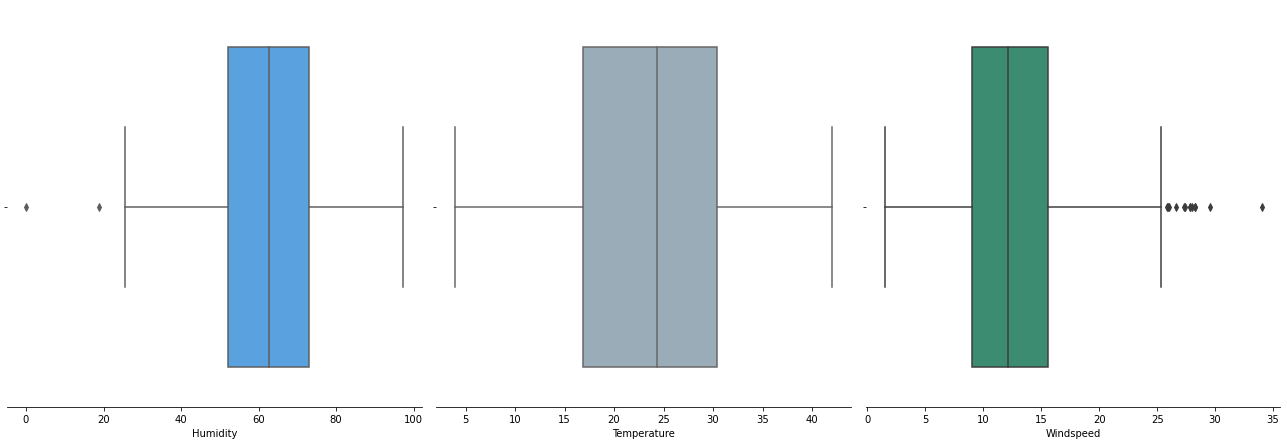

In [52]:
# fig, axes = plt.subplots(2, 2, figsize=(18, 5), sharey=False)
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)



sns.boxplot(df.hum, ax=ax1, color = "#43A4F5")
ax1.set_xlabel('Humidity')


sns.boxplot(df.atemp, ax=ax2, color= "#96ADBE")
ax2.set_xlabel('Temperature')

sns.boxplot(df.windspeed, ax=ax3, color = "#2F9975")
ax3.set_xlabel('Windspeed')



sns.despine(left=True)

plt.tight_layout()

plt.show()


### Observation:

- Humidity has outliers on the lower side

- Windspeed has outliers on the higher side

- Tempearture does not seem to have outliers


In [53]:
df.shape

(730, 10)

### Observation: 

- With only 730 rows, which will be further broken down to Training and Testing set, removing outliers will remove data points from our dataset

- Therefore, no outlier handling will be done

# Exploratory Data Analysis

## Univariate Analysis

### Creating Bins 

Creating bins for the analysis of continuous variables

In [54]:
eda = df.copy()

In [55]:
pd.qcut(eda.atemp, 4, labels=["low", "medium", "high", "very high"]).value_counts()

low          183
very high    183
medium       182
high         182
Name: atemp, dtype: int64

In [56]:
eda['temp_bins'] = pd.qcut(eda.atemp, 4, labels=["low", "medium", "high", "very high"])

In [57]:
# Looking into humidity

In [58]:
pd.qcut(eda.hum, 4, labels=["low", "medium", "high", "very high"]).value_counts()

low          184
very high    183
high         182
medium       181
Name: hum, dtype: int64

In [59]:
eda['hum_bins'] = pd.qcut(eda.hum, 4, labels=["low", "medium", "high", "very high"])

In [60]:
# Looking into windspeed

In [61]:
pd.qcut(eda.windspeed, 4, labels=["low", "medium", "high", "very high"]).value_counts()

low          184
very high    183
medium       182
high         181
Name: windspeed, dtype: int64

In [62]:
eda['windspeed_bins'] = pd.qcut(eda.windspeed, 4, labels=["low", "medium", "high", "very high"])

In [63]:
eda.head()

,season,yr,mnth,holiday,weathersit,atemp,hum,windspeed,cnt,weekday,temp_bins,hum_bins,windspeed_bins
0,Spring,2018,Jan,0,Mist,18.18125,80.5833,10.749882,985,Mon,medium,very high,medium
1,Spring,2018,Jan,0,Mist,17.68695,69.6087,16.652113,801,Tue,medium,high,very high
2,Spring,2018,Jan,0,Clear,9.47025,43.7273,16.636703,1349,Wed,low,low,very high
3,Spring,2018,Jan,0,Clear,10.60610,59.0435,10.739832,1562,Thu,low,medium,medium
4,Spring,2018,Jan,0,Clear,11.46350,43.6957,12.522300,1600,Fri,low,low,high


In [64]:
#--------------------------------Defining a function to annotate bar graphs---------------------------------------#

In [65]:
def annotate_graph(ax):
       
    for bar in ax.patches: 
        ax.annotate(format((bar.get_height()), '.1f'),  
                   (bar.get_x() + bar.get_width() / 2,  bar.get_height()), 
                   ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points')
    return ax

# Data Visualisation

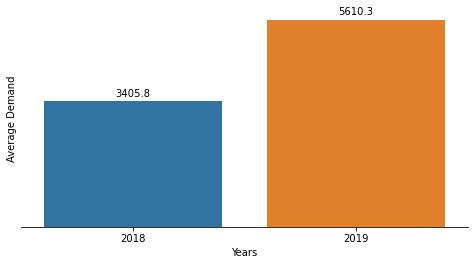

In [66]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = eda.yr, y=eda.cnt, estimator=np.mean, ci=None)

ax = annotate_graph(ax)

plt.ylabel('Average Demand')
plt.xlabel('Years')
plt.yticks([], [])
sns.despine(left=True)

plt.show()

### Observation
- 2019 shows more than 60% growth in demand

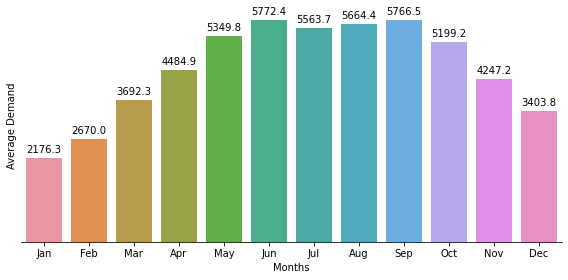

In [67]:
plt.figure(figsize=(8,4))
myOrder = ["Jan", "Feb", "Mar","Apr", "May", "Jun", "Jul" , "Aug" , "Sep" , "Oct" , "Nov" , "Dec"]
ax = sns.barplot(x = eda.mnth, y=eda.cnt, estimator=np.mean, ci=None, order=myOrder)

ax = annotate_graph(ax)

plt.ylabel('Average Demand')
plt.xlabel('Months')
plt.yticks([], [])
sns.despine(left=True)

plt.tight_layout()
plt.show()


### Observation
- Demands steady rises till Fall Season and then slowly declines. 

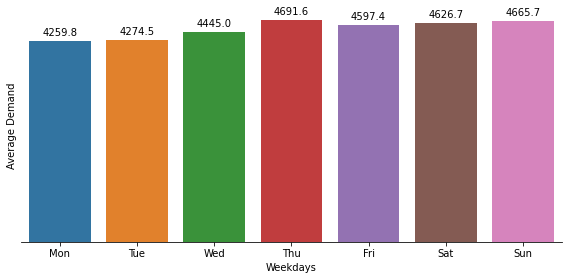

In [68]:
plt.figure(figsize=(8,4))
myOrder = ["Mon", "Tue", "Wed","Thu", "Fri", "Sat", "Sun"]
ax = sns.barplot(x = eda.weekday, y=eda.cnt, estimator=np.mean, ci=None, order=myOrder)

ax = annotate_graph(ax)

plt.ylabel('Average Demand')
plt.xlabel('Weekdays')
plt.yticks([], [])
sns.despine(left=True)

plt.tight_layout()
plt.show()

### Observation
- There is not much one can say from days of the week. 
- People do demand for bikes more at the later half of the week but the trend is not strong

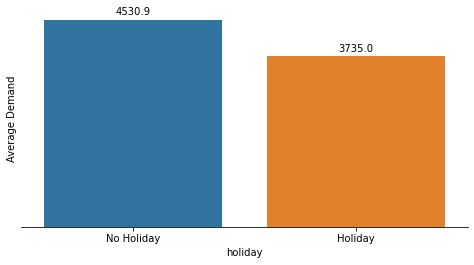

In [69]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = eda.holiday, y=eda.cnt, estimator=np.mean, ci=None, order=[0,1])

ax = annotate_graph(ax)

plt.ylabel('Holidays')
plt.ylabel('Average Demand')
plt.yticks([])
ax.set_xticklabels(['No Holiday','Holiday'])
sns.despine(left=True)

plt.show()

### Observation
- Demand for bikes is more on working days. Most likely, office commutes increases demand 

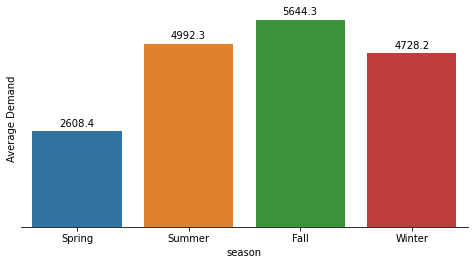

In [70]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = eda.season, y=eda.cnt, estimator=np.mean, ci=None)

ax = annotate_graph(ax)

plt.ylabel('Average Demand')
plt.yticks([])
sns.despine(left=True)

plt.show()

### Observation
- Fall season has the highest average bike demand
- Spring sees the biggest dip
- Summer and Winter have similar demands

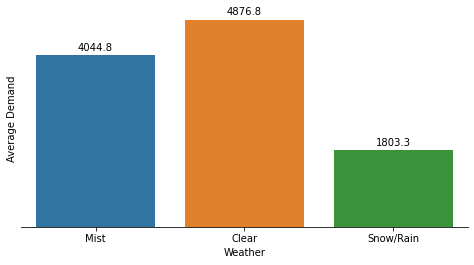

In [71]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = eda.weathersit, y=eda.cnt, estimator=np.mean, ci=None)

ax = annotate_graph(ax)

plt.ylabel('Average Demand')
plt.xlabel('Weather')
plt.yticks([])
sns.despine(left=True)

plt.show()

### Observation
- It is not surprising to see demands for bikes rise in clear weather and be very low in snowy or rainy condition

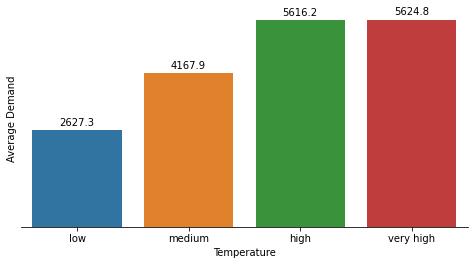

In [72]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = eda.temp_bins, y=eda.cnt, estimator=np.mean, ci=None)

ax = annotate_graph(ax)

plt.ylabel('Average Demand')
plt.xlabel('Temperature')
plt.yticks([])
sns.despine(left=True)

plt.show()

### Observation
- Demands rise in warm and hot condition

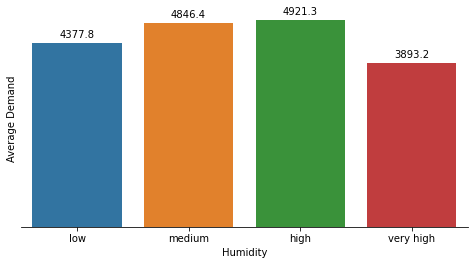

In [73]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = eda.hum_bins, y=eda.cnt, estimator=np.mean, ci=None)

ax = annotate_graph(ax)

plt.ylabel('Average Demand')
plt.xlabel('Humidity')
plt.yticks([])
sns.despine(left=True)

plt.show()

### Observation
- As expected, people don't prefer bikes on very humid days

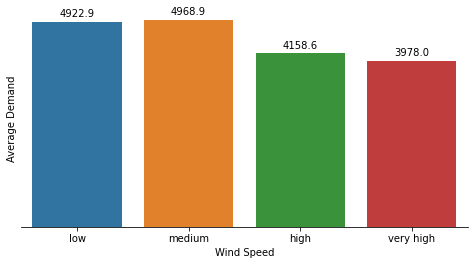

In [74]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = eda.windspeed_bins, y=eda.cnt, estimator=np.mean, ci=None)

ax = annotate_graph(ax)

plt.ylabel('Average Demand')
plt.xlabel('Wind Speed')
plt.yticks([])
sns.despine(left=True)

plt.show()

### Observation
- As expected, people prefer biking in less windy condition when it is easier to ride a bike

## Bivariate Analysis

In [75]:
eda.head()


,season,yr,mnth,holiday,weathersit,atemp,hum,windspeed,cnt,weekday,temp_bins,hum_bins,windspeed_bins
0,Spring,2018,Jan,0,Mist,18.18125,80.5833,10.749882,985,Mon,medium,very high,medium
1,Spring,2018,Jan,0,Mist,17.68695,69.6087,16.652113,801,Tue,medium,high,very high
2,Spring,2018,Jan,0,Clear,9.47025,43.7273,16.636703,1349,Wed,low,low,very high
3,Spring,2018,Jan,0,Clear,10.60610,59.0435,10.739832,1562,Thu,low,medium,medium
4,Spring,2018,Jan,0,Clear,11.46350,43.6957,12.522300,1600,Fri,low,low,high


[]

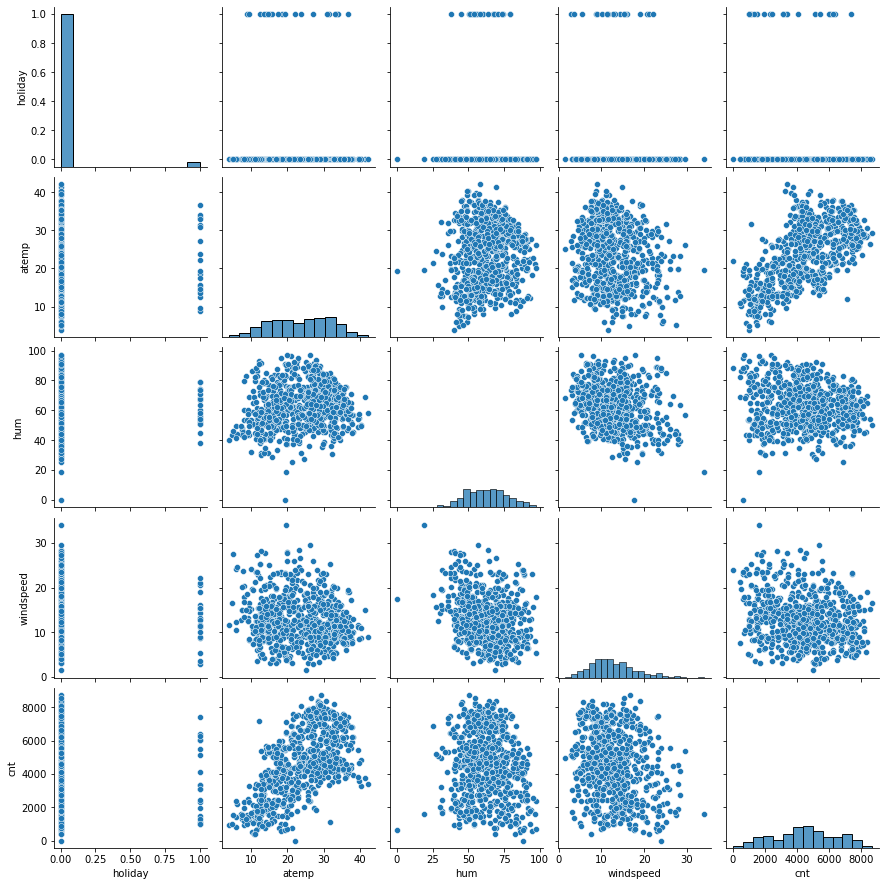

In [76]:
sns.pairplot(eda)
plt.plot()

### Observation
- Bike demand has positive correlation with Temperature
- Humidity and Demand follow a normal Distribution with centre somewhere close to 60 unit humidity
- Lower windspeeds see higher demand

In [77]:
ba1 = pd.pivot_table(data=eda, index="windspeed_bins", columns="temp_bins", values="cnt")

In [78]:
ba2 = pd.pivot_table(data=eda, index="windspeed_bins", columns="hum_bins", values="cnt")

In [79]:
ba3 = pd.pivot_table(data=eda, index="temp_bins", columns="hum_bins", values="cnt")

In [80]:
ba4 = pd.pivot_table(data=eda, index="weekday", columns="season", values="cnt")

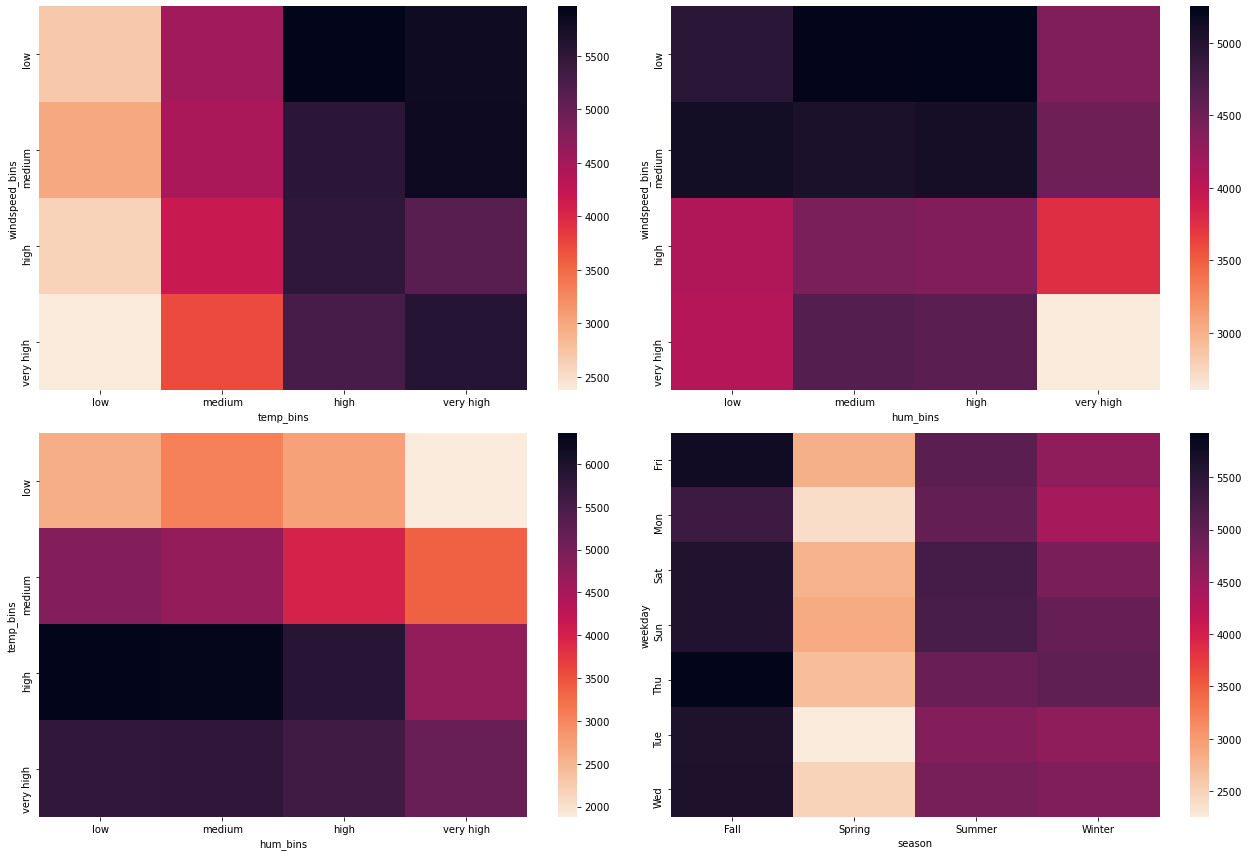

In [81]:
# fig, axes = plt.subplots(2, 2, figsize=(18, 5), sharey=False)
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)



sns.heatmap(ax=ax1,data=ba1, annot=False, cmap=sns.cm.rocket_r)
sns.heatmap(ax=ax2,data=ba2, annot=False, cmap=sns.cm.rocket_r)
sns.heatmap(ax=ax3,data=ba3, annot=False, cmap=sns.cm.rocket_r)
sns.heatmap(ax=ax4,data=ba4, annot=False, cmap=sns.cm.rocket_r)


plt.tight_layout()

plt.show()

### Observation
- Demands are high for Low windspeed and high temperature. Even at high wind speed, if temperature is high, demand stays high


- People demand for bikes more if windspeed and humidity is low


- People demand for bikes more if temperature is high and and humidity is low. But if temperature is high or very high, then humidity does not have a severe negative affect on demand


- Spring sees a dip in demand. In Fall, Thursday and Fri are the most popular days for bike demands

In [82]:
grouped = eda.loc[:,['weekday', 'cnt']].groupby(['weekday']).max().sort_values(by='cnt')

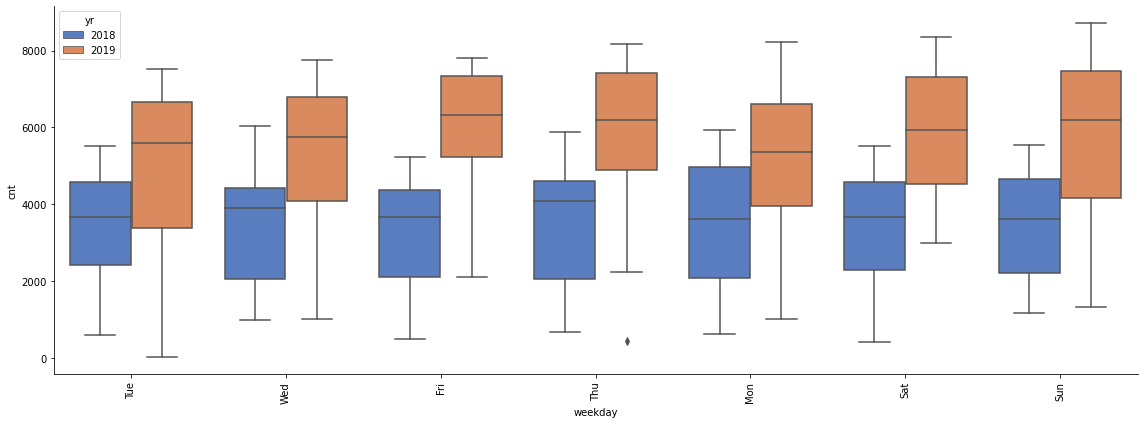

In [83]:
fig = plt.figure(figsize=(16, 6))

sns.boxplot(x="weekday", y="cnt", data=eda, hue="yr" ,palette="muted", order=grouped.index)

plt.xticks(rotation="vertical")
plt.tight_layout()
sns.despine()
plt.show()

### Observation:
- Though Sunday has the highest maximum demand but the medians all are identical for 2019
- For 2018, the medians vary. Thursday enjoyed the highest demand back in 2018

## Multivariate Analysis

[]

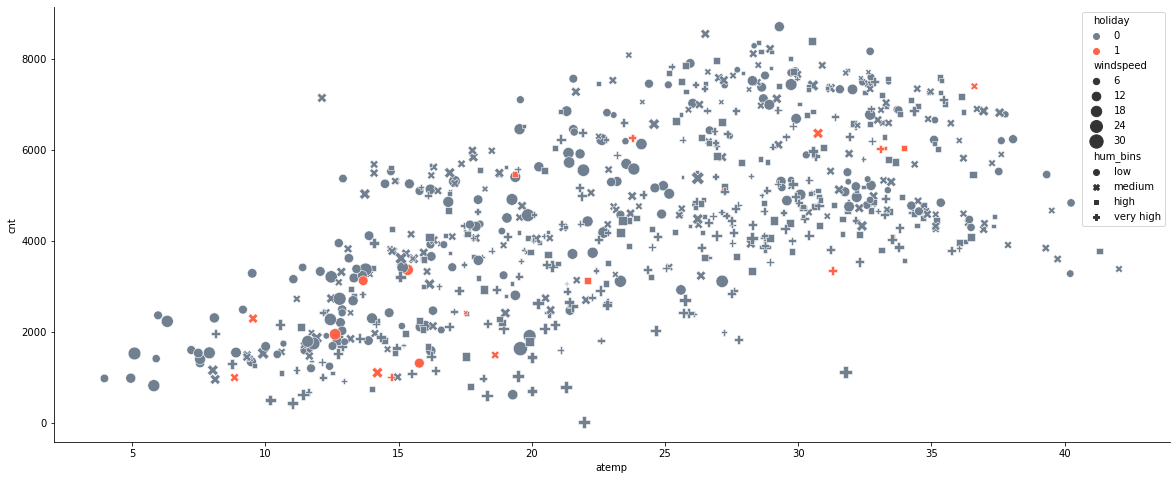

In [84]:
fig = plt.figure(figsize=(20, 8))

sns.scatterplot(x="atemp", y="cnt", hue="holiday", 
                data=eda, style="hum_bins",size="windspeed", sizes=(15, 200),
                palette=["slategrey","tomato"] )

sns.despine()

plt.plot()

### Observation

- Temperature between 25C to 33C is favorable
- No Holidays is favorable
- Low windspeed is favourable
- low and medium humidity is favourable

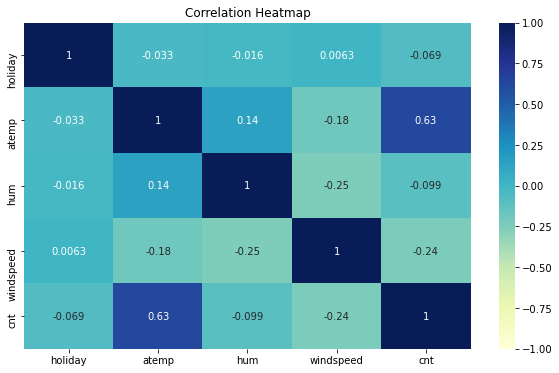

In [85]:
# plot heat map to see correlation between features
plt.figure(figsize=(10,6))
myData = eda.corr()

sns.heatmap(myData,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

### Observation

- Temperature has the highest influence on bike demand

# Regression Modelling

# Data Preparation

## Dummy Variables

In [86]:
df.head()

,season,yr,mnth,holiday,weathersit,atemp,hum,windspeed,cnt,weekday
0,Spring,2018,Jan,0,Mist,18.18125,80.5833,10.749882,985,Mon
1,Spring,2018,Jan,0,Mist,17.68695,69.6087,16.652113,801,Tue
2,Spring,2018,Jan,0,Clear,9.47025,43.7273,16.636703,1349,Wed
3,Spring,2018,Jan,0,Clear,10.60610,59.0435,10.739832,1562,Thu
4,Spring,2018,Jan,0,Clear,11.46350,43.6957,12.522300,1600,Fri


### Season

In [87]:
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [88]:
# Season has Four Levels
pd.get_dummies(df.season, drop_first=True)

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [89]:
season_status = pd.get_dummies(df.season, drop_first=True)

#Adding the results to the original housing dataframe
df = pd.concat([df, season_status], axis=1)

# Now let's see the head of dataframe
df.head()

,season,yr,mnth,holiday,weathersit,atemp,hum,windspeed,cnt,weekday,Spring,Summer,Winter
0,Spring,2018,Jan,0,Mist,18.18125,80.5833,10.749882,985,Mon,1,0,0
1,Spring,2018,Jan,0,Mist,17.68695,69.6087,16.652113,801,Tue,1,0,0
2,Spring,2018,Jan,0,Clear,9.47025,43.7273,16.636703,1349,Wed,1,0,0
3,Spring,2018,Jan,0,Clear,10.60610,59.0435,10.739832,1562,Thu,1,0,0
4,Spring,2018,Jan,0,Clear,11.46350,43.6957,12.522300,1600,Fri,1,0,0


In [90]:
# confirming Winter and Summer has true values as well
df.Winter.value_counts()

0    552
1    178
Name: Winter, dtype: int64

In [91]:
df.Summer.value_counts()

0    546
1    184
Name: Summer, dtype: int64

In [92]:
# Dropping Season as dummy variable is already created
df.drop("season", axis=1, inplace=True)

In [93]:
# Now let's see the head of dataframe
df.head()

,yr,mnth,holiday,weathersit,atemp,hum,windspeed,cnt,weekday,Spring,Summer,Winter
0,2018,Jan,0,Mist,18.18125,80.5833,10.749882,985,Mon,1,0,0
1,2018,Jan,0,Mist,17.68695,69.6087,16.652113,801,Tue,1,0,0
2,2018,Jan,0,Clear,9.47025,43.7273,16.636703,1349,Wed,1,0,0
3,2018,Jan,0,Clear,10.60610,59.0435,10.739832,1562,Thu,1,0,0
4,2018,Jan,0,Clear,11.46350,43.6957,12.522300,1600,Fri,1,0,0


### Month

In [94]:
df.mnth.value_counts()

Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [95]:
# Month has 12 Levels
pd.get_dummies(df.mnth, drop_first=True)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [96]:
month_status = pd.get_dummies(df.mnth, drop_first=True)

#Adding the results to the original housing dataframe
df = pd.concat([df, month_status], axis=1)

# Now let's see the head of dataframe
df.head()

,yr,mnth,holiday,weathersit,atemp,hum,windspeed,cnt,weekday,Spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2018,Jan,0,Mist,18.18125,80.5833,10.749882,985,Mon,1,...,0,0,1,0,0,0,0,0,0,0
1,2018,Jan,0,Mist,17.68695,69.6087,16.652113,801,Tue,1,...,0,0,1,0,0,0,0,0,0,0
2,2018,Jan,0,Clear,9.47025,43.7273,16.636703,1349,Wed,1,...,0,0,1,0,0,0,0,0,0,0
3,2018,Jan,0,Clear,10.60610,59.0435,10.739832,1562,Thu,1,...,0,0,1,0,0,0,0,0,0,0
4,2018,Jan,0,Clear,11.46350,43.6957,12.522300,1600,Fri,1,...,0,0,1,0,0,0,0,0,0,0


In [97]:
#Let's drop month column since it's already converted into dummy variable
df.drop("mnth", axis=1, inplace=True)

### Year

In [98]:
df.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [99]:
#Turning year to binary where 0--> "2018" and 1 --> "2019"
df['yr'] = df.yr.apply(lambda x: 0 if x==2018 else 1)

### Weather Situation

In [100]:
#Weather Situation has Three Levels
df.weathersit.value_counts()

Clear        463
Mist         246
Snow/Rain     21
Name: weathersit, dtype: int64

In [101]:
weather_status = pd.get_dummies(df.weathersit, drop_first=True)

#Adding the results to the original housing dataframe
df = pd.concat([df, weather_status], axis=1)

# Now let's see the head of dataframe
df.head()

,yr,holiday,weathersit,atemp,hum,windspeed,cnt,weekday,Spring,Summer,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mist,Snow/Rain
0,0,0,Mist,18.18125,80.5833,10.749882,985,Mon,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,Mist,17.68695,69.6087,16.652113,801,Tue,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,Clear,9.47025,43.7273,16.636703,1349,Wed,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,Clear,10.60610,59.0435,10.739832,1562,Thu,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,Clear,11.46350,43.6957,12.522300,1600,Fri,1,0,...,1,0,0,0,0,0,0,0,0,0


In [102]:
# Dropping Weather Situation as dummy variable is already created
df.drop("weathersit", axis=1, inplace=True)

In [103]:
# Making sure Clear, Mist and Snow/Rain have columns
df.Mist.value_counts()

0    484
1    246
Name: Mist, dtype: int64

In [104]:
df['Snow/Rain'].value_counts()

0    709
1     21
Name: Snow/Rain, dtype: int64

### Weekday

In [105]:
#WeekDay should have 7 levels. Confirming
df.weekday.value_counts().shape[0]

7

In [106]:
df.weekday.value_counts()

Mon    105
Tue    105
Fri    104
Sat    104
Sun    104
Thu    104
Wed    104
Name: weekday, dtype: int64

In [107]:
weekday_status = pd.get_dummies(df.weekday, drop_first=True)

#Adding the results to the original housing dataframe
df = pd.concat([df, weekday_status], axis=1)

In [108]:
# Dropping Weekday since dummy columns have been created
df.drop("weekday", axis=1, inplace=True)

### DataFrame after Dummy Variable Creation

In [109]:
# Now let's see the head of dataframe
df.head()

,yr,holiday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sep,Mist,Snow/Rain,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df.shape

(730, 28)

## Splitting the Data into trainning and testing split

In [111]:
from sklearn.model_selection import train_test_split

# Random State is mentioned so that consistent result is obtained every time
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state = 747)

## Rescaling the Features

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [113]:
# Now let's see the head of dataframe
df.head(2)

,yr,holiday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sep,Mist,Snow/Rain,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [114]:
df.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'cnt', 'Spring', 'Summer',
       'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Mist', 'Snow/Rain', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

In [115]:
continuous_var = ["atemp", "hum", "windspeed"]
df_train[continuous_var] = scaler.fit_transform(df_train[continuous_var])
df_train.head()

,yr,holiday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sep,Mist,Snow/Rain,Mon,Sat,Sun,Thu,Tue,Wed
62,0,0,0.231824,0.627678,0.431695,1944,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
246,0,0,0.769676,0.763067,0.439141,4940,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
132,0,0,0.545046,0.887746,0.375344,4105,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
128,0,0,0.585667,0.605398,0.366457,4362,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
248,0,0,0.572480,0.912038,0.767112,2710,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


### Observation

Our three continuous variables: "atemp", "hum", "windspeed" have been scaled between 0 to 1
    

## Dividing trainning dataset to X and Y for the model building

In [116]:
#pop will remove the column and return it to y_train
y_train = df_train.pop("cnt")
X_train = df_train

In [117]:
y_train.head()

62     1944
246    4940
132    4105
128    4362
248    2710
Name: cnt, dtype: int64

In [118]:
X_train.head()

,yr,holiday,atemp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,...,Oct,Sep,Mist,Snow/Rain,Mon,Sat,Sun,Thu,Tue,Wed
62,0,0,0.231824,0.627678,0.431695,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
246,0,0,0.769676,0.763067,0.439141,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
132,0,0,0.545046,0.887746,0.375344,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
128,0,0,0.585667,0.605398,0.366457,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
248,0,0,0.572480,0.912038,0.767112,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


# Data Modelling

## Recursive Feature Elimination

- We will use RFE to get **top 20 columns**

In [119]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [120]:
# Creating the Linear Regression Model and running RFE to get top 20 columns

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
ref = rfe.fit(X_train, y_train)

In [121]:
# Checking out the selected columns

top20 = X_train.columns[rfe.support_]
top20

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Mar', 'May', 'Nov', 'Sep',
       'Mist', 'Snow/Rain', 'Mon', 'Tue'],
      dtype='object')

### Observation

- As we had also seen our Exploratory Data Analysis, weekdays did not have much impact on demand

- We can see that none of the weekday dummy variables could make it into top15 columns


## Building StatsModel

In [122]:
# creating X_train dataframe with RFE selected top20 variables

X_train_rfe = X_train[top20]

In [123]:
import statsmodels.api as sm

#Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [124]:
#Running the model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [125]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.48e-186
Time:                        07:39:48   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     489   BIC:                             8328.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3698.5187    321.844     11.492      0.000    3066.150    4330.887
yr          1999.3302     68.770     29.073      0.000    1864.209    2134.451
holiday     -713.7103    217.255     -3.285      0.001   -1140.578    -286.842
atemp       3292.6774    348.211      9.456      0.000    2608.504    3976.851
hum        -1386.8793    324.534     -4.273      0.000   -2024.532    -749.227
windspeed   -923.2572    199.331     -4.632      0.000   -1314.908    -531.606
Spring      -903.3886    215.350     -4.195      0.000   -1326.514    -480.264
Summer      -143.9084    142.070     -1.013      0.312    -423.052     135.235
Winter       627.7866    148.076      4.240      0.000     336.842     918.731
Dec         -703.7793    177.686     -3.961      0.000   -1052.901    -354.658
Feb         -519.0783    242.035     -2.145      0.032    -994.635     -43.522
Jan         -722.8937    244.685     -2.954      0.003   -1203.658    -242.129
Jul         -472.9602    152.081     -3.110      0.002    -771.773    -174.148
Mar         -132.0992    183.392     -0.720      0.472    -492.434     228.235
May          329.0880    146.350      2.249      0.025      41.535     616.641
Nov         -769.8973    174.922     -4.401      0.000   -1113.588    -426.206
Sep          331.9179    149.827      2.215      0.027      37.533     626.302
Mist        -464.4928     90.669     -5.123      0.000    -642.642    -286.344
Snow/Rain  -2100.2763    215.113     -9.764      0.000   -2522.935   -1677.617
Mon         -306.3700     98.776     -3.102      0.002    -500.447    -112.293
Tue         -311.8787    101.173     -3.083      0.002    -510.666    -113.091
==============================================================================
Omnibus:                       63.265   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.581
Skew:                          -0.665   Prob(JB):                     2.44e-32
Kurtosis:                       5.255   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
- Mar and Summer have a p-value more than 0.05. With Mar having the highest p-value of 0.472
- Model is able to explain 84.9% variance. (r-squared value: 0.849)
- Adjusted r-squared value: 0.843
- The model is overall significant as the prob(F-stat) is low
- Coeff of constant shows the demand when all columns are zero. ie: 
    - year = 0: 2018
    - winter, spring, summer = 0 0 0 : Fall 
    - Mist, Snow/Rain = 0 0: Clear 
    - and so on...

In [126]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Defining a function to give VIF value
def vif_cal(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)

    vif = vif.sort_values(by="VIF", ascending=False)

    return vif

In [127]:
vif = vif_cal(X_train_rfe)
vif

,Features,VIF
0,const,90.47
6,Spring,7.69
3,atemp,4.91
11,Jan,4.62
10,Feb,3.53
8,Winter,3.43
7,Summer,3.37
13,Mar,2.27
9,Dec,2.22
4,hum,2.00


### Observation

- Mar: High p-value, Low VIF
- Summer: High p-value, Low VIF
- Spring: Low p-value, High VIF

By Rule of thumb, we will remove Mar first becase VIF can decrease then

### Dropping Mar (p-value=0.472)

In [128]:
X_train_rfe.head()

,const,yr,holiday,atemp,hum,windspeed,Spring,Summer,Winter,Dec,...,Jan,Jul,Mar,May,Nov,Sep,Mist,Snow/Rain,Mon,Tue
62,1.0,0,0,0.231824,0.627678,0.431695,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
246,1.0,0,0,0.769676,0.763067,0.439141,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
132,1.0,0,0,0.545046,0.887746,0.375344,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
128,1.0,0,0,0.585667,0.605398,0.366457,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
248,1.0,0,0,0.572480,0.912038,0.767112,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [129]:
X_train_rfe.shape

(510, 21)

In [130]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Mar', 'May', 'Nov',
       'Sep', 'Mist', 'Snow/Rain', 'Mon', 'Tue'],
      dtype='object')

In [131]:
# Dropping Mar and recreating model
X_train_rfe.drop("Mar", axis=1, inplace=True)


In [132]:
lm = sm.OLS(y_train, X_train_rfe ).fit()

In [133]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.69e-187
Time:                        07:39:48   Log-Likelihood:                -4099.0
No. Observations:                 510   AIC:                             8238.
Df Residuals:                     490   BIC:                             8323.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3647.1208    313.680     11.627      0.0

In [134]:
vif = vif_cal(X_train_rfe)

vif

,Features,VIF
0,const,86.02
6,Spring,5.81
3,atemp,4.47
8,Winter,3.43
7,Summer,3.34
11,Jan,2.60
10,Feb,2.08
4,hum,1.99
14,Nov,1.79
9,Dec,1.75


### Observation

- Summer has High P-value, Low VIF
- Spring has Low P-value, high VIF

### Dropping Summer (p-value=0.280)

In [135]:
# Dropping Mar and recreating model
X_train_rfe.drop("Summer", axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe).fit()


In [136]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.26e-188
Time:                        07:39:48   Log-Likelihood:                -4099.6
No. Observations:                 510   AIC:                             8237.
Df Residuals:                     491   BIC:                             8318.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3485.9653    276.146     12.624      0.000    2943.391    4028.539
yr          1996.4443     68.710     29.056      0.000    1861.442    2131.447
holiday     -710.5062    216.680     -3.279      0.001   -1136.240    -284.773
atemp       3528.1336    297.241     11.870      0.000    2944.112    4112.155
hum        -1423.9599    323.175     -4.406      0.000   -2058.936    -788.984
windspeed   -938.9098    198.690     -4.726      0.000   -1329.297    -548.523
Spring      -865.4614    154.335     -5.608      0.000   -1168.700    -562.223
Winter       716.0827    122.624      5.840      0.000     475.149     957.016
Dec         -611.0538    154.638     -3.952      0.000    -914.888    -307.220
Feb         -382.5443    184.214     -2.077      0.038    -744.489     -20.600
Jan         -571.1530    180.527     -3.164      0.002    -925.855    -216.451
Jul         -425.4846    144.128     -2.952      0.003    -708.668    -142.301
May          278.3520    128.772      2.162      0.031      25.340     531.364
Nov         -708.1785    167.465     -4.229      0.000   -1037.215    -379.142
Sep          394.0927    140.837      2.798      0.005     117.375     670.810
Mist        -461.5510     90.582     -5.095      0.000    -639.526    -283.575
Snow/Rain  -2083.7453    214.653     -9.708      0.000   -2505.497   -1661.994
Mon         -302.1265     98.674     -3.062      0.002    -496.002    -108.251
Tue         -311.8281    100.965     -3.088      0.002    -510.204    -113.452
==============================================================================
Omnibus:                       62.009   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.914
Skew:                          -0.661   Prob(JB):                     6.84e-31
Kurtosis:                       5.188   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
vif = vif_cal(X_train_rfe)

In [138]:
vif

,Features,VIF
0,const,66.65
6,Spring,3.95
3,atemp,3.58
10,Jan,2.52
7,Winter,2.35
9,Feb,2.05
4,hum,1.98
13,Nov,1.73
8,Dec,1.68
15,Mist,1.59


### Observation: 
- All columns are significant with p-value less than 0.05
- There is no problem of multicollinearity with predictor columns less than 5

### Constant is significant. But has high VIF

- Conceptually it doesn't matter if we add or remove the constant from the VIF calculation. 

- Overall it doesn't make a difference for the model, **because the constant is not a predictor.**

- A constant has irrational VIF values as it is not supposed to be calculated/factored.

- **Therefore, not dropping the constant.** 

- Coeff of constant shows the demand when all columns are zero. ie:
    - year => 0---> "2018"
    - winter, spring, summer => 0 0 0 : "Fall"
    - Mist, Snow/Rain => 0 0: "Clear"
    - and so on...
    - Therefore, with all them zero, our model assumes that the demand will be 3485.9 ie 3486

In [139]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.26e-188
Time:                        07:39:49   Log-Likelihood:                -4099.6
No. Observations:                 510   AIC:                             8237.
Df Residuals:                     491   BIC:                             8318.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3485.9653    276.146     12.624      0.000    2943.391    4028.539
yr          1996.4443     68.710     29.056      0.000    1861.442    2131.447
holiday     -710.5062    216.680     -3.279      0.001   -1136.240    -284.773
atemp       3528.1336    297.241     11.870      0.000    2944.112    4112.155
hum        -1423.9599    323.175     -4.406      0.000   -2058.936    -788.984
windspeed   -938.9098    198.690     -4.726      0.000   -1329.297    -548.523
Spring      -865.4614    154.335     -5.608      0.000   -1168.700    -562.223
Winter       716.0827    122.624      5.840      0.000     475.149     957.016
Dec         -611.0538    154.638     -3.952      0.000    -914.888    -307.220
Feb         -382.5443    184.214     -2.077      0.038    -744.489     -20.600
Jan         -571.1530    180.527     -3.164      0.002    -925.855    -216.451
Jul         -425.4846    144.128     -2.952      0.003    -708.668    -142.301
May          278.3520    128.772      2.162      0.031      25.340     531.364
Nov         -708.1785    167.465     -4.229      0.000   -1037.215    -379.142
Sep          394.0927    140.837      2.798      0.005     117.375     670.810
Mist        -461.5510     90.582     -5.095      0.000    -639.526    -283.575
Snow/Rain  -2083.7453    214.653     -9.708      0.000   -2505.497   -1661.994
Mon         -302.1265     98.674     -3.062      0.002    -496.002    -108.251
Tue         -311.8281    100.965     -3.088      0.002    -510.204    -113.452
==============================================================================
Omnibus:                       62.009   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.914
Skew:                          -0.661   Prob(JB):                     6.84e-31
Kurtosis:                       5.188   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation

- **R-squared**: The model is able to explain 84.9% of variance in data. 

- **Adj-R-squared**: The model is able to explain 84.3% of variance in data. 

- **Prob (F-statistic**: Is very low, signifying that the model is overall statiscally significant

- **Important Features**: Temperature, Snow/Rain Conditions, and year are the top features based on coeff. 


# Residual Analysis

In [140]:
X_train_rfe.head()

,const,yr,holiday,atemp,hum,windspeed,Spring,Winter,Dec,Feb,Jan,Jul,May,Nov,Sep,Mist,Snow/Rain,Mon,Tue
62,1.0,0,0,0.231824,0.627678,0.431695,1,0,0,0,0,0,0,0,0,1,0,0,0
246,1.0,0,0,0.769676,0.763067,0.439141,0,0,0,0,0,0,0,0,1,0,0,0,1
132,1.0,0,0,0.545046,0.887746,0.375344,0,0,0,0,0,0,1,0,0,1,0,0,0
128,1.0,0,0,0.585667,0.605398,0.366457,0,0,0,0,0,0,1,0,0,0,0,0,0
248,1.0,0,0,0.572480,0.912038,0.767112,0,0,0,0,0,0,0,0,1,0,1,0,0


In [141]:
y_train_pred = lm.predict(X_train_rfe)

In [142]:
residual = y_train - y_train_pred

### Normal Distribution of errors

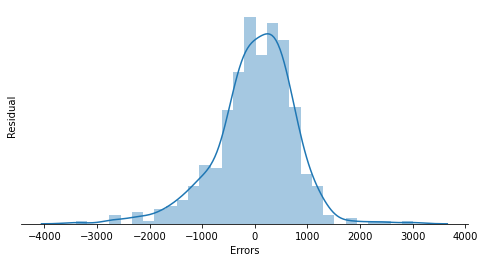

In [143]:
plt.figure(figsize=(8,4))
ax = sns.distplot(residual)


plt.ylabel('Residual')
plt.xlabel('Errors')
plt.yticks([])
sns.despine(left=True)

plt.show()

### Observation:

- Errors are normally distributed
- Mean of error is qualitatively zero

### Scatterplot of Predictions v/s Residuals

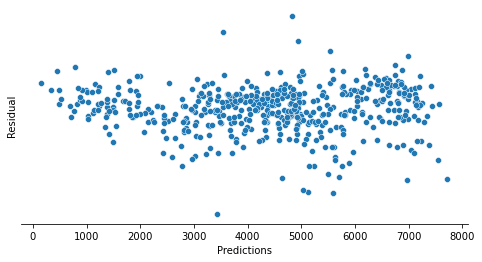

In [144]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=y_train_pred, y=residual)


plt.ylabel('Residual')
plt.xlabel('Predictions')
plt.yticks([])
# plt.xticks([])
sns.despine(left=True)

plt.show()

### Observation:

- Error Terms have no pattern and therefore, are independent.
- Apart from few outliers, variance is consistent. Error terms equal variance. 

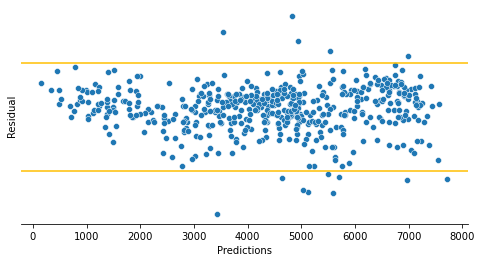

In [145]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=y_train_pred, y=residual)

plt.axhline(y=1500, color='#FFBF00', linestyle='-')
plt.axhline(y=-2000, color='#FFBF00', linestyle='-')

plt.ylabel('Residual')
plt.xlabel('Predictions')
plt.yticks([])
# plt.xticks([])
sns.despine(left=True)

plt.show()

### Observation:

- Apart from few outliers, variance is consistent. Error terms have equal variance. 
- Since we did not perform outlier handling, we can expect few points to be outside our imaginary parallel lines but almost all data points do lie within the lines

# Making Predictions

In [146]:
df.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'cnt', 'Spring', 'Summer',
       'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Mist', 'Snow/Rain', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

In [147]:
df.head(2)

,yr,holiday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sep,Mist,Snow/Rain,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [148]:
const_var = ["atemp", "hum", "windspeed"]

In [149]:
df_test[const_var] = scaler.transform(df_test[const_var])

### Dividing into Testing DataFrame into X and Y 

In [150]:
y_test = df_test.pop("cnt")
X_test = df_test

### Making Predictions with our model

In [151]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep', 'Mist',
       'Snow/Rain', 'Mon', 'Tue'],
      dtype='object')

In [152]:
# since constant term is added by us, it is not present in X_Test
X_train_rfe.columns[1:]

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep', 'Mist', 'Snow/Rain', 'Mon',
       'Tue'],
      dtype='object')

In [153]:
X_test = X_test[X_train_rfe.columns[1:]]

In [154]:
X_test = sm.add_constant(X_test)

In [155]:
X_test.head(1)

,const,yr,holiday,atemp,hum,windspeed,Spring,Winter,Dec,Feb,Jan,Jul,May,Nov,Sep,Mist,Snow/Rain,Mon,Tue
61,1.0,0,0,0.158912,0.327335,0.485153,1,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
y_test_pred = lm.predict(X_test)

# Model Evaluation

In [157]:
from sklearn.metrics import r2_score

In [158]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8317417208092988

### Observation: 

- We got 84.9% in Training Dataset
- We got 83.1% in Testing Dataste

- (84.9-83.1)/(84.9) * 100 = 2.1%

- Therefore, difference between R2 score of train and test dataset is less than 5%

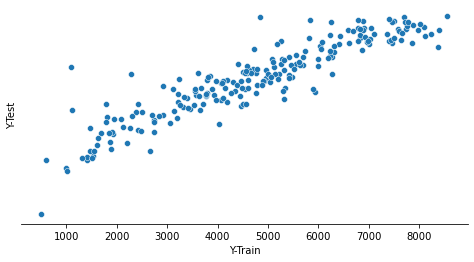

In [159]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=y_test, y=y_test_pred)


plt.ylabel('Y-Test')
plt.xlabel('Y-Train')
plt.yticks([])
# plt.xticks([])
sns.despine(left=True)

plt.show()

### Observation:
- Strong correlation

# Analysing R-Squared and Adjusted R-Squared

### R-Squared

In [160]:
#Test Set
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8317417208092988

In [161]:
# Training Set
r2_score(y_true = y_train, y_pred = y_train_pred)

0.8486139204011544

### Observation: 

- **R-squared Train DataSet**: The model is able to explain 84% of variance in data. 
    
- **R-squared Test DataSet**: The model is able to explain 83% of variance in data.     

### Adjusted R-Squared

In [162]:
# Adj. RSquared for Train
1-(1-r2_score(y_train, y_train_pred))*((len(X_train)-1)/(len(X_train)-len(X_train.columns)-1))

0.8401337873115925

In [163]:
# Adj. RSquared for Test
1-(1-r2_score(y_test, y_test_pred))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))

0.8156768599820459

### Observation: 

- **Adj-R-squared Train DataSet**: The model is able to explain 84% of variance in data. 
    
- **Adj-R-squared Test DataSet**: The model is able to explain 81% of variance in data.     

# Final Model

In [164]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.26e-188
Time:                        07:47:44   Log-Likelihood:                -4099.6
No. Observations:                 510   AIC:                             8237.
Df Residuals:                     491   BIC:                             8318.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3485.9653    276.146     12.624      0.000    2943.391    4028.539
yr          1996.4443     68.710     29.056      0.000    1861.442    2131.447
holiday     -710.5062    216.680     -3.279      0.001   -1136.240    -284.773
atemp       3528.1336    297.241     11.870      0.000    2944.112    4112.155
hum        -1423.9599    323.175     -4.406      0.000   -2058.936    -788.984
windspeed   -938.9098    198.690     -4.726      0.000   -1329.297    -548.523
Spring      -865.4614    154.335     -5.608      0.000   -1168.700    -562.223
Winter       716.0827    122.624      5.840      0.000     475.149     957.016
Dec         -611.0538    154.638     -3.952      0.000    -914.888    -307.220
Feb         -382.5443    184.214     -2.077      0.038    -744.489     -20.600
Jan         -571.1530    180.527     -3.164      0.002    -925.855    -216.451
Jul         -425.4846    144.128     -2.952      0.003    -708.668    -142.301
May          278.3520    128.772      2.162      0.031      25.340     531.364
Nov         -708.1785    167.465     -4.229      0.000   -1037.215    -379.142
Sep          394.0927    140.837      2.798      0.005     117.375     670.810
Mist        -461.5510     90.582     -5.095      0.000    -639.526    -283.575
Snow/Rain  -2083.7453    214.653     -9.708      0.000   -2505.497   -1661.994
Mon         -302.1265     98.674     -3.062      0.002    -496.002    -108.251
Tue         -311.8281    100.965     -3.088      0.002    -510.204    -113.452
==============================================================================
Omnibus:                       62.009   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.914
Skew:                          -0.661   Prob(JB):                     6.84e-31
Kurtosis:                       5.188   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Coefficients are rounded for presentation purpose
**Demand** = 3486 + (yr x 1996) - (holiday x 710) + (atemp x 3528) - (hum x 1424) - (windspeed x 939) - (Spring x 864) + (winter x 716) - (Dec x 611) - (Feb x 382) - (Jan x 571) - (Jul x 425) + (May x 278) - (Nov x 708) + (Sep x 394) - (Mist x 461) - (Snow/Rain x 2083) - (Mon x 302)